In [1]:
#Transfer learning approach

#Created dict bottlenecks of size 2048 using Inception v3 for all training and test set
#Created array of one shot encoded labels for training files
#Created array of filenames corresponding to these labels to get features from bottlenecks dict
#Created mapping from label index to filename to write test submission

In [2]:
#We upload all the packages we need
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import time
from datetime import timedelta
import math
import os
import scipy.misc
from scipy.stats import itemfreq
from random import sample
import pickle
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# Image manipulation.
import PIL.Image
from IPython.display import display
#from resizeimage import resizeimage

#Panda
import pandas as pd

#Open a Zip File
from zipfile import ZipFile
from io import BytesIO

#check tensorflow version
tf.__version__

'1.0.0'

In [3]:
#Read in all pickle files

#training bottleneck features
#load TRAIN
train = pickle.load( open( "train_pickle_dict.p", "rb" ) )
print(len(train))

#test bottleneck features
#load TEST
test = pickle.load( open( "test_pickle_dict.p", "rb" ) )
print(len(test))

#load one shot encoded features
train_labels_encoded = pickle.load( open("one_shot_encoded_labels.p", "rb"))
print(train_labels_encoded.shape)

#load filenames
filenames = pickle.load( open("filenames.p", "rb"))
print(filenames.shape)

#load id to label name match
id_to_labels = pickle.load( open("id_to_labelnames.p", "rb"))
print(id_to_labels.shape)

#Used for sanity checks only
#df_train= pd.read_csv('labels.csv')

10222
10357
(10222, 120)
(10222,)
(120,)


- Name of file for chosen index : 000bec180eb18c7604dcecc8fe0dba07
- One shot encoded label for chosen index : [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
- This Label for chosen index corresponds to the breed: boston_bull
- Feature for chosen index : ['0.481187', '0.496551', '0.306193', '0.113356', '0.692414', '0.1901', '0.0669326', '0.181607', '0.0918662', '0.448612', '0.114666', '0.162591', '0.525339', '0.34633', '0.253209', '0.12324', '0.165107', '0.284855', '0.454276', '0.149186', '0.034305', '0.538685', '0.572602', '0.241571', '0.0571458', '0.1

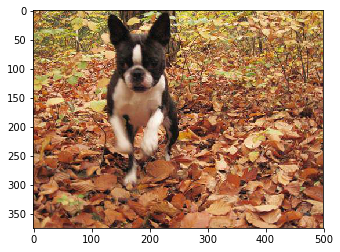

NameError: name 'df_train' is not defined

In [4]:
#Do some sanity checks

index = 0

filename_index = filenames[index]
print('- Name of file for chosen index : {0}'.format(filename_index))

index_one_shot_encoded_label = train_labels_encoded[index]
print('- One shot encoded label for chosen index : {0}'.format(index_one_shot_encoded_label))

labels_cls = np.argmax(index_one_shot_encoded_label, axis=0)
index_label_feature = id_to_labels[labels_cls]
print('- This Label for chosen index corresponds to the breed: {0}'.format(index_label_feature))

index_feature = train[filename_index]
print('- Feature for chosen index : {0}'.format(index_feature))

#Check filename and indexs match to original data
filename = os.path.join("train",filenames[index]+'.jpg')
image = PIL.Image.open(filename) # open colour image
plt.imshow(image)
plt.show()

df_train.iloc[index]


In [ ]:
#Build a classifier layer which will work on the features to try and decide breed

In [9]:
#Perform train-validation split
num_validation = 10

#X_validation = {key:train[key] for i, key in enumerate(train) if i % num_validation == 0}
#X_train = {key:train[key] for i, key in enumerate(train) if i % num_validation != 0}

y_validation = train_labels_encoded[0::num_validation]
y_train = [item for index, item in enumerate(train_labels_encoded) if index % num_validation != 0]

filename_validation = filenames[0::num_validation]
filename_train = [item for index, item in enumerate(filenames) if index % num_validation != 0]

#create list of features for input
X_validation = []
for i in range(0,len(filename_validation)):
    X_validation.append(train[filename_validation[i]])

print(len(X_features_validation))

X_train = []
for i in range(0,len(filename_train)):
    X_train.append(train[filename_train[i]])

print(len(filename_train))

1023
9199


In [34]:
#Convert everything to np.array
X_1 = np.array(X_train)
X_train = X_1.astype(np.float)

X_1 = np.array(X_validation)
X_validation = X_1.astype(np.float)

Y_1 = np.array(y_validation)
y_validation = Y_1.astype(np.float)

Y_1 = np.array(y_train)
y_train = Y_1.astype(np.float)

print(X_train.shape)

(9199, 2048)


In [182]:
#Load testing features
#test bottleneck features
#load TEST
test = pickle.load( open( "test_pickle_dict.p", "rb" ) )
print(len(test))

#read set of filenames and make a list of filenames to use to index 
#X_test = [test[key] for key in enumerate(test)]
test_filenames_key = [key for key in enumerate(test)]
print(len(test_filenames_key))
X_test = []
test_filenames = []
for filename_1 in test_filenames_key:
    X_test.append(test[filename_1[1]])
    test_filenames.append(filename_1[1])
print(len(X_test))

#Convert everything to np.array
X_1 = np.array(X_test)
X_test = X_1.astype(np.float)
X_test.shape

#X_test_input = X_test.reshape(X_test.shape[0],1,X_test.shape[1])    

10357
10357
10357


(10357, 2048)

In [163]:
#Create network to be used

#Test with a simple fc layer followed by a softmax

#Create inputs for labels and features
x_input = tf.placeholder("float", [None, 2048], name='x')#features
y_input = tf.placeholder("float", [None, 120], name='y')#labels                                   

In [164]:
def class_net(x):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : return: Tensor that represents logits
    """
    #Create a fully connected fc layer
    # TODO: Implement Function
    dim = x.get_shape().as_list() 
    
    fc_weight = tf.Variable(tf.truncated_normal([dim[1], 120]))        
    fc_bias = tf.Variable(tf.zeros(120))

    # Apply multiplication        
    fc_layer = tf.matmul(x, fc_weight)
    # Add bias
    out = tf.nn.bias_add(fc_layer, fc_bias)
    # Apply activation function, maybe not for now
    #out = tf.nn.relu(out)          

    # TODO: return output
    return out

In [186]:
# Model
logits = class_net(x_input)

softmaxed_output = tf.nn.softmax(logits)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y_input))
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y_input, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

In [187]:
def train_neural_network(session, optimizer, feature_batch, label_batch):
    """
    Optimize the session on a batch of images and labels
    : session: Current TensorFlow session
    : optimizer: TensorFlow optimizer function
    : keep_probability: keep probability
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    """
    # TODO: Implement Function
    session.run(optimizer, feed_dict={
                x_input: feature_batch,
                y_input: label_batch})
    pass


In [188]:
def print_stats(session, feature_batch, label_batch, cost, accuracy):
    """
    Print information about loss and validation accuracy
    : session: Current TensorFlow session
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    : cost: TensorFlow cost function
    : accuracy: TensorFlow accuracy function
    """
    # TODO: Implement Function
    loss = session.run(cost, feed_dict={
                       x_input: feature_batch,
                       y_input: label_batch})
    acc = session.run(accuracy, feed_dict={
                       x_input: X_validation,
                       y_input: y_validation})
    print('Loss: {:>10.4f} Validation Accuracy: {:.6f}'.format(loss,acc))
    pass

In [195]:
# TODO: Tune Parameters
epochs = 200
batch_size = 1024
num_batches = int(np.ceil(X_train.shape[0] / (batch_size)))    
print(num_batches)

9


In [196]:
print('Running the Training on Bottlenecks...')

with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        for batch_i in range(0,num_batches):
            batch_features = X_train[batch_i*batch_size:min(X_train.shape[0],(batch_i + 1)*batch_size - 1),:]
            batch_labels = y_train[batch_i*batch_size:min(y_train.shape[0],(batch_i + 1)*batch_size - 1),:]  
            train_neural_network(sess, optimizer, batch_features, batch_labels)
        print('Epoch {:>2}, Batches {}:  '.format(epoch + 1, batch_i + 1), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)
        
    #Run testing on this model    
    test_labels = sess.run(softmaxed_output,feed_dict={x_input: X_test}) 
    
    sub = pd.DataFrame(test_labels)
    # Set column names to those generated by the one-hot encoding earlier    
    sub.columns = id_to_labels
    # Insert the column id from the sample_submission at the start of the data frame
    sub.insert(0, 'id', test_filenames)
    #sub.head(5)
    
    

Running the Training on Bottlenecks...
Epoch  1, Batches 9:  Loss:    32.2907 Validation Accuracy: 0.015640
Epoch  2, Batches 9:  Loss:    28.4530 Validation Accuracy: 0.020528
Epoch  3, Batches 9:  Loss:    25.6587 Validation Accuracy: 0.022483
Epoch  4, Batches 9:  Loss:    23.4681 Validation Accuracy: 0.030303
Epoch  5, Batches 9:  Loss:    21.5861 Validation Accuracy: 0.042033
Epoch  6, Batches 9:  Loss:    19.8456 Validation Accuracy: 0.053763
Epoch  7, Batches 9:  Loss:    18.1906 Validation Accuracy: 0.068426
Epoch  8, Batches 9:  Loss:    16.6226 Validation Accuracy: 0.085044
Epoch  9, Batches 9:  Loss:    15.1433 Validation Accuracy: 0.101662
Epoch 10, Batches 9:  Loss:    13.7539 Validation Accuracy: 0.123167
Epoch 11, Batches 9:  Loss:    12.4537 Validation Accuracy: 0.149560
Epoch 12, Batches 9:  Loss:    11.2431 Validation Accuracy: 0.175953
Epoch 13, Batches 9:  Loss:    10.1266 Validation Accuracy: 0.221896
Epoch 14, Batches 9:  Loss:     9.1061 Validation Accuracy: 0.25

In [197]:
sub.to_csv('Dog_BreedIdentifcation_submission_np.csv')

In [191]:
sub.head(5)

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,73025eaafe20e929eaec9217fd92308a,2.280500e-10,1.595384e-20,4.577328e-09,1.587397e-11,1.521801e-08,1.369992e-09,1.584458e-24,3.237309e-17,7.184309e-14,...,1.560861e-05,8.515029e-18,2.095079e-12,4.565336e-18,2.731456e-04,1.345445e-17,8.575871e-11,9.297486e-11,3.869928e-17,8.436613e-20
1,ea5ae600ca3996528b6548eceac767cf,6.475857e-24,9.040426e-06,6.362932e-13,2.235398e-09,8.050448e-18,1.050604e-09,4.973009e-14,2.070142e-22,1.795176e-24,...,1.419421e-09,8.059953e-23,1.476508e-16,8.154714e-15,2.866874e-19,1.828163e-07,6.513569e-08,1.103073e-16,2.811951e-06,2.491762e-19
2,d93ed7c927ef625fac3f7c1aa2ebae50,8.297014e-18,2.512200e-11,1.797209e-06,2.940375e-13,7.180389e-17,5.062440e-14,7.279664e-13,9.850331e-23,1.779897e-24,...,3.307258e-13,4.604060e-15,2.562954e-09,8.571051e-16,1.619298e-17,6.101712e-16,3.225486e-17,2.298454e-07,7.271172e-09,3.999965e-25
3,11da794edbcb3f36ab3bb60427252404,8.390046e-19,4.193865e-06,6.086124e-06,1.845709e-07,2.662789e-10,2.767049e-08,4.515505e-25,2.752590e-15,1.436044e-23,...,7.232207e-14,1.691134e-20,8.106960e-16,5.239041e-16,3.580143e-09,1.138908e-14,1.273042e-14,6.815223e-07,1.150523e-15,5.413856e-28
4,d4f5c15370f69fdd190acc3247595b08,4.594298e-04,1.112561e-11,2.032481e-14,1.125687e-13,2.580449e-15,2.685704e-08,2.990724e-16,1.671536e-06,7.254029e-12,...,1.235395e-04,1.135843e-10,3.146819e-08,6.198695e-07,4.303279e-14,2.111481e-13,3.724301e-09,1.353300e-09,1.926267e-06,1.104555e-09


In [194]:
test_filenames[1]

'ea5ae600ca3996528b6548eceac767cf'